<a href="https://colab.research.google.com/github/Omarasks/Investment-Research/blob/main/Nigerian_stocks_Investment_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git


  Cloning https://github.com/rongardF/tvdatafeed.git to /tmp/pip-req-build-zqoxxvd_
  Running command git clone --filter=blob:none --quiet https://github.com/rongardF/tvdatafeed.git /tmp/pip-req-build-zqoxxvd_
  Resolved https://github.com/rongardF/tvdatafeed.git to commit e6f6aaa7de439ac6e454d9b26d2760ded8dc4923
  Preparing metadata (setup.py) ... done
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=17533 sha256=f5a8b06b6318f9ef3c1dd38866b7eba8394a87f8967a19d05a87da7a10edc61f
  Stored in directory: /tmp/pip-ephem-wheel-cache-247c1me2/wheels/4b/f9/e9/82474a5d9a64702ba7dd5481dee05d267c69bcfa480d382b7c
Successfully built tvdatafeed


# Import Datafeed from Trading view






In [3]:
from tvDatafeed import TvDatafeed, Interval

username = 'askomarfarouq'
password = 'Askomar@134'

tv = TvDatafeed(username, password)

### Import Libraries


In [4]:
import pandas as pd


### Create stocklist to fetch from Trading View

In [7]:
Ngx_ticker = ["UNILEVER", "ACCESSCORP", "LIVESTOCK", "CONOIL", "CUSTODIAN","GTCO","PRESCO","REGALINS", "SOVRENINS"] # Changed to uppercase
df = pd.DataFrame()

for ticker in Ngx_ticker:
    data = tv.get_hist(ticker, 'NSENG', Interval.in_monthly)['close'] # Changed Ngx_ticker to ticker
    # Add a check if data is not None before accessing 'close'
    if data is not None:
        # Process the data here, e.g., append to df
        df[ticker] = data  # Assuming you want to store data in a DataFrame
    else:
        print(f"Failed to retrieve data for {ticker}")

### View Stocks monthly close price in a dataframe  

In [8]:
df

,UNILEVER,ACCESSCORP,LIVESTOCK,CONOIL,CUSTODIAN,GTCO,PRESCO,REGALINS,SOVRENINS
datetime,,,,,,,,,
2024-04-02 09:15:00,14.75,16.850000,1.67,99.949997,8.60,32.700001,209.00000,0.205555,0.42
2024-05-02 09:15:00,15.05,17.200001,1.65,105.000000,9.50,40.000000,267.20001,0.200000,0.44
2024-06-03 09:15:00,18.00,18.950001,1.87,105.000000,10.20,45.000000,354.20001,0.222222,0.45
2024-07-01 09:15:00,16.85,18.299999,2.39,144.000000,11.45,44.000000,413.00000,0.250000,0.55
2024-08-01 09:15:00,18.00,19.000000,2.50,144.000000,11.25,45.500000,485.39999,0.250000,0.68
2024-09-02 09:15:00,19.15,20.600000,2.99,168.000000,12.80,48.000000,485.40000,0.416666,0.56
2024-10-02 09:15:00,23.00,22.050000,3.87,189.300000,12.90,53.700000,485.40000,0.480000,0.57
2024-11-01 09:15:00,26.65,23.200000,3.51,276.000000,12.95,52.950000,450.00000,0.460000,0.73
2024-12-02 09:15:00,32.95,23.850000,4.12,387.200000,17.10,57.000000,475.00000,0.750000,1.12


### Plot Monthly close price

<Axes: xlabel='datetime'>

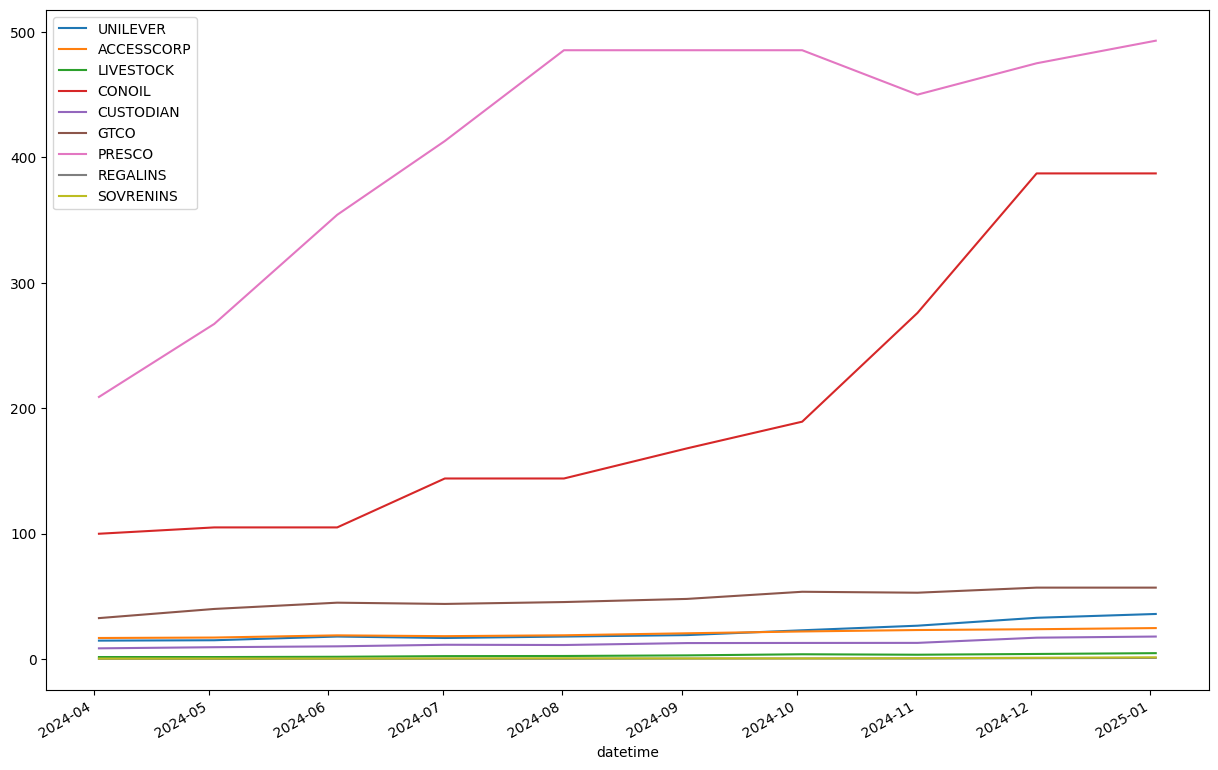

In [9]:
df.plot(figsize = (15,10))

### Min Close price for the month





In [10]:
df.min()

,0
UNILEVER,14.750000
ACCESSCORP,16.850000
LIVESTOCK,1.650000
CONOIL,99.949997
CUSTODIAN,8.600000
GTCO,32.700001
PRESCO,209.000000
REGALINS,0.200000
SOVRENINS,0.420000


### Max close price for the month


In [11]:
df.max()

,0
UNILEVER,36.00
ACCESSCORP,24.75
LIVESTOCK,4.76
CONOIL,387.20
CUSTODIAN,18.00
GTCO,57.00
PRESCO,493.00
REGALINS,0.96
SOVRENINS,1.44


### % change of price returns




In [12]:
df.pct_change()

,UNILEVER,ACCESSCORP,LIVESTOCK,CONOIL,CUSTODIAN,GTCO,PRESCO,REGALINS,SOVRENINS
datetime,,,,,,,,,
2024-04-02 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02 09:15:00,0.020339,0.020772,-0.011976,0.050525,0.104651,0.223242,2.784689e-01,-0.027027,0.047619
2024-06-03 09:15:00,0.196013,0.101744,0.133333,0.000000,0.073684,0.125000,3.255988e-01,0.111111,0.022727
2024-07-01 09:15:00,-0.063889,-0.034301,0.278075,0.371429,0.122549,-0.022222,1.660079e-01,0.125000,0.222222
2024-08-01 09:15:00,0.068249,0.038251,0.046025,0.000000,-0.017467,0.034091,1.753026e-01,0.000000,0.236364
2024-09-02 09:15:00,0.063889,0.084211,0.196000,0.166667,0.137778,0.054945,2.060157e-08,0.666667,-0.176471
2024-10-02 09:15:00,0.201044,0.070388,0.294314,0.126786,0.007812,0.118750,0.000000e+00,0.152001,0.017857
2024-11-01 09:15:00,0.158696,0.052154,-0.093023,0.458003,0.003876,-0.013966,-7.292954e-02,-0.041667,0.280702
2024-12-02 09:15:00,0.236398,0.028017,0.173789,0.402899,0.320463,0.076487,5.555556e-02,0.630435,0.534247


### Correlation Analysis of price changes


In [13]:
df.pct_change().corr()

,UNILEVER,ACCESSCORP,LIVESTOCK,CONOIL,CUSTODIAN,GTCO,PRESCO,REGALINS,SOVRENINS
UNILEVER,1.000000,0.639792,-0.030500,0.074401,0.149749,0.185357,-0.268333,0.236898,0.233277
ACCESSCORP,0.639792,1.000000,-0.080543,-0.392548,-0.232853,0.290744,-0.085579,0.178831,-0.508991
LIVESTOCK,-0.030500,-0.080543,1.000000,-0.026809,0.281226,-0.096856,-0.065143,0.489940,-0.161743
CONOIL,0.074401,-0.392548,-0.026809,1.000000,0.420064,-0.442414,-0.512761,0.194891,0.462965
CUSTODIAN,0.149749,-0.232853,0.281226,0.420064,1.000000,0.134808,0.030765,0.730514,0.359370
GTCO,0.185357,0.290744,-0.096856,-0.442414,0.134808,1.000000,0.535472,-0.100154,-0.389219
PRESCO,-0.268333,-0.085579,-0.065143,-0.512761,0.030765,0.535472,1.000000,-0.361742,-0.171918
REGALINS,0.236898,0.178831,0.489940,0.194891,0.730514,-0.100154,-0.361742,1.000000,0.020725
SOVRENINS,0.233277,-0.508991,-0.161743,0.462965,0.359370,-0.389219,-0.171918,0.020725,1.000000


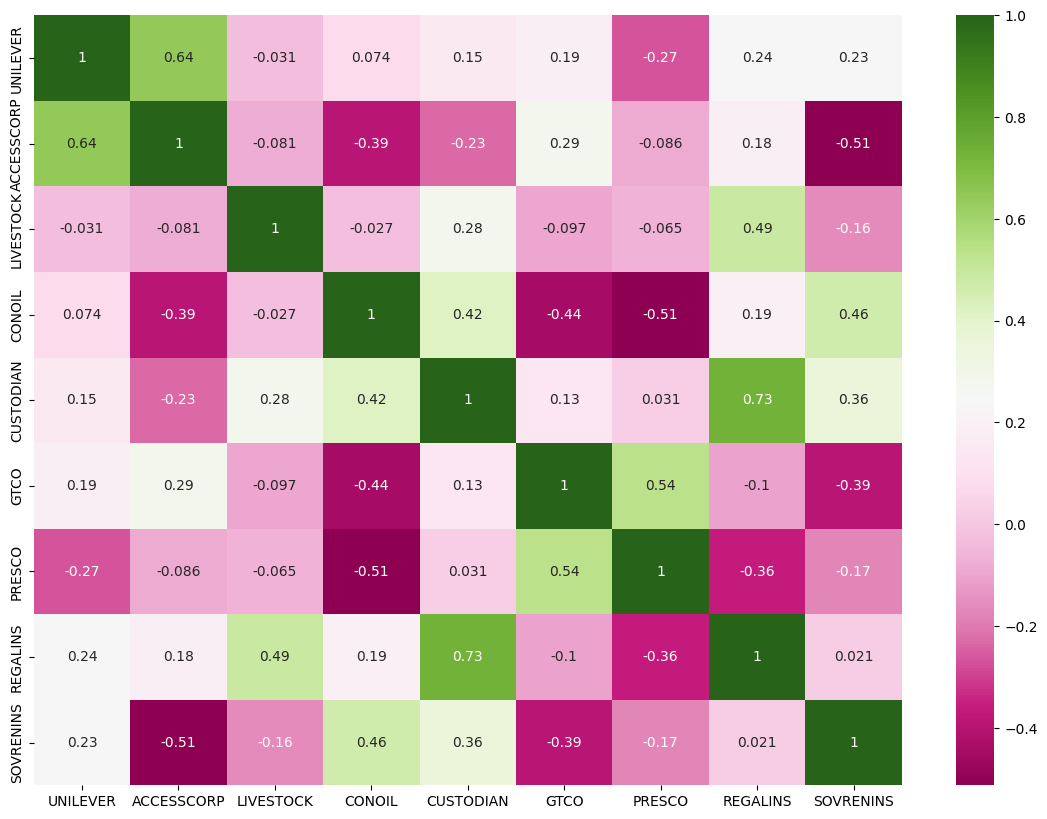

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.pct_change().corr(), annot = True, cmap="PiYG");

### Insights

1.   DANGCEM: has lowest correlation with BUAFOODS and highest correlation MTNN. DANGCEM can be paired with MTNN and BUACEMENT to maximize portfolio returns and BUAFOODS for portfolio diversification.
2.   BUAFOODS has lowest correlation with BUACEMENT, good pair for portfolio diversification
3. MTNN is a good pair with DANGCEM, BUAFOODS for diversification
4. GTCO, FBNH, ZENITHBANK are closely correlated, very good for returns maximization for portfolio diversification BUACEMENT
5. GEREGU, FBNH are closely correlated, good pair for return maximization, BUACEMENT for diversification



## Markowitz efficient frontier

## Returns

In [15]:
returns = (df/df.shift(1)) - 1
returns.dropna(inplace = True)
returns

,UNILEVER,ACCESSCORP,LIVESTOCK,CONOIL,CUSTODIAN,GTCO,PRESCO,REGALINS,SOVRENINS
datetime,,,,,,,,,
2024-05-02 09:15:00,0.020339,0.020772,-0.011976,0.050525,0.104651,0.223242,2.784689e-01,-0.027027,0.047619
2024-06-03 09:15:00,0.196013,0.101744,0.133333,0.000000,0.073684,0.125000,3.255988e-01,0.111111,0.022727
2024-07-01 09:15:00,-0.063889,-0.034301,0.278075,0.371429,0.122549,-0.022222,1.660079e-01,0.125000,0.222222
2024-08-01 09:15:00,0.068249,0.038251,0.046025,0.000000,-0.017467,0.034091,1.753026e-01,0.000000,0.236364
2024-09-02 09:15:00,0.063889,0.084211,0.196000,0.166667,0.137778,0.054945,2.060157e-08,0.666667,-0.176471
2024-10-02 09:15:00,0.201044,0.070388,0.294314,0.126786,0.007812,0.118750,0.000000e+00,0.152001,0.017857
2024-11-01 09:15:00,0.158696,0.052154,-0.093023,0.458003,0.003876,-0.013966,-7.292954e-02,-0.041667,0.280702
2024-12-02 09:15:00,0.236398,0.028017,0.173789,0.402899,0.320463,0.076487,5.555556e-02,0.630435,0.534247
2025-01-02 09:15:00,0.092564,0.037736,0.155340,0.000000,0.052632,0.000000,3.789474e-02,0.280000,0.285714


## Log Returns

In [16]:
import numpy as np


In [17]:
logReturns = np.log(returns)
logReturns

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,UNILEVER,ACCESSCORP,LIVESTOCK,CONOIL,CUSTODIAN,GTCO,PRESCO,REGALINS,SOVRENINS
datetime,,,,,,,,,
2024-05-02 09:15:00,-3.895216,-3.874170,NaN,-2.985281,-2.257123,-1.499501,-1.278449,NaN,-3.044522
2024-06-03 09:15:00,-1.629573,-2.285294,-2.014903,-inf,-2.607967,-2.079442,-1.122089,-2.197225,-3.784190
2024-07-01 09:15:00,NaN,NaN,-1.279865,-0.990399,-2.099244,NaN,-1.795720,-2.079441,-1.504077
2024-08-01 09:15:00,-2.684589,-3.263575,-3.078568,-inf,NaN,-3.378725,-1.741241,-inf,-1.442384
2024-09-02 09:15:00,-2.750610,-2.474435,-1.629641,-1.791759,-1.982113,-2.901422,-17.697899,-0.405465,NaN
2024-10-02 09:15:00,-1.604230,-2.653728,-1.223107,-2.065257,-4.852030,-2.130735,-inf,-1.883866,-4.025352
2024-11-01 09:15:00,-1.840767,-2.953551,NaN,-0.780879,-5.552960,NaN,NaN,NaN,-1.270463
2024-12-02 09:15:00,-1.442240,-3.574935,-1.749912,-0.909070,-1.137987,-2.570631,-2.890372,-0.461346,-0.626898
2025-01-02 09:15:00,-2.379850,-3.277145,-1.862140,-inf,-2.944439,-inf,-3.272943,-1.272966,-1.252763


## Return vs Volatility Chart

##### Generating portfolio simulations

In [18]:
no_of_portfolios = 100
weight = np.zeros((no_of_portfolios, len(Ngx_ticker)))
expected_return = np.zeros(no_of_portfolios)
expected_volatility = np.zeros(no_of_portfolios)
sharpe_ratio = np.zeros(no_of_portfolios)


meanLogReturns = returns.mean()
Sigma = returns.cov()

for k in range (no_of_portfolios):
    # Generate random weights for the portfolio
    portfolio_weight = np.array(np.random.random(len(Ngx_ticker)))
    portfolio_weight = portfolio_weight / np.sum(portfolio_weight)
    # Assign the portfolio weights to the weight matrix
    weight[k,:] = portfolio_weight  # Assign to the k-th row of 'weight'

    # Expected log return
    expected_return[k] = np.sum(meanLogReturns * portfolio_weight) # Store the result in the array
    # Expected volatility
    expected_volatility[k] = np.sqrt(np.dot(portfolio_weight.T, np.dot(returns.cov(), portfolio_weight))) # Store the result in the array
    # Sharpe Ratio
    sharpe_ratio[k] = expected_return[k] / expected_volatility[k] # Store the result in the array

In [19]:
expected_return

array([0.13787209, 0.12031789, 0.10321323, 0.11516762, 0.11307803,
       0.12841565, 0.113862  , 0.13054907, 0.12092246, 0.11482791,
       0.14562625, 0.12257949, 0.1165236 , 0.11375843, 0.11218978,
       0.12235328, 0.12700323, 0.10753788, 0.12773668, 0.13225205,
       0.1048564 , 0.13238131, 0.10100568, 0.10511349, 0.12651061,
       0.11879208, 0.13624505, 0.12199419, 0.11529655, 0.11602991,
       0.13051655, 0.14563641, 0.1198226 , 0.12968378, 0.12129521,
       0.13197654, 0.13301436, 0.1298425 , 0.12776095, 0.1226995 ,
       0.11492788, 0.12450378, 0.11329153, 0.12731039, 0.11561526,
       0.12101256, 0.13086752, 0.11156342, 0.13209025, 0.1166622 ,
       0.13492168, 0.12498748, 0.12690023, 0.1138936 , 0.10764539,
       0.1238316 , 0.12100252, 0.11687428, 0.14092571, 0.11478603,
       0.13541589, 0.12872007, 0.12054331, 0.1271595 , 0.13481095,
       0.1127591 , 0.10790581, 0.11586842, 0.14124797, 0.10954761,
       0.11256262, 0.13738366, 0.08876048, 0.11748269, 0.11843

In [20]:
expected_volatility

array([0.09008206, 0.0708157 , 0.04675881, 0.05181149, 0.06504159,
       0.06114385, 0.05272621, 0.06937141, 0.07438547, 0.06118956,
       0.08450128, 0.06020466, 0.0579823 , 0.04778304, 0.06051628,
       0.07007523, 0.07389798, 0.04673374, 0.07276762, 0.08974041,
       0.05404134, 0.0852151 , 0.05191607, 0.0500864 , 0.06037488,
       0.08227911, 0.09814177, 0.07245084, 0.07301895, 0.0554205 ,
       0.0792854 , 0.07951231, 0.08553695, 0.07091358, 0.05521517,
       0.07156488, 0.08028736, 0.07299089, 0.0813272 , 0.06266946,
       0.05793397, 0.07071955, 0.05481363, 0.07810458, 0.05152219,
       0.06985309, 0.08000091, 0.05692783, 0.0726058 , 0.06970551,
       0.0806961 , 0.06821476, 0.07269187, 0.05705137, 0.0546006 ,
       0.07290811, 0.06868905, 0.06588326, 0.08476703, 0.05861203,
       0.08291681, 0.06904032, 0.0668185 , 0.08441591, 0.07074003,
       0.07325224, 0.04996765, 0.05980859, 0.08795651, 0.0574715 ,
       0.04309629, 0.08358665, 0.04615338, 0.06488012, 0.06788

## Portfolio weightings

In [21]:
maxIndex = sharpe_ratio.argmax()
portfolio_weight = weight[maxIndex,:]
portfolio_weight

array([0.18941919, 0.10234593, 0.13507168, 0.15632614, 0.04018202,
       0.13089841, 0.20686192, 0.03688802, 0.00200669])

## Efficient Frontier

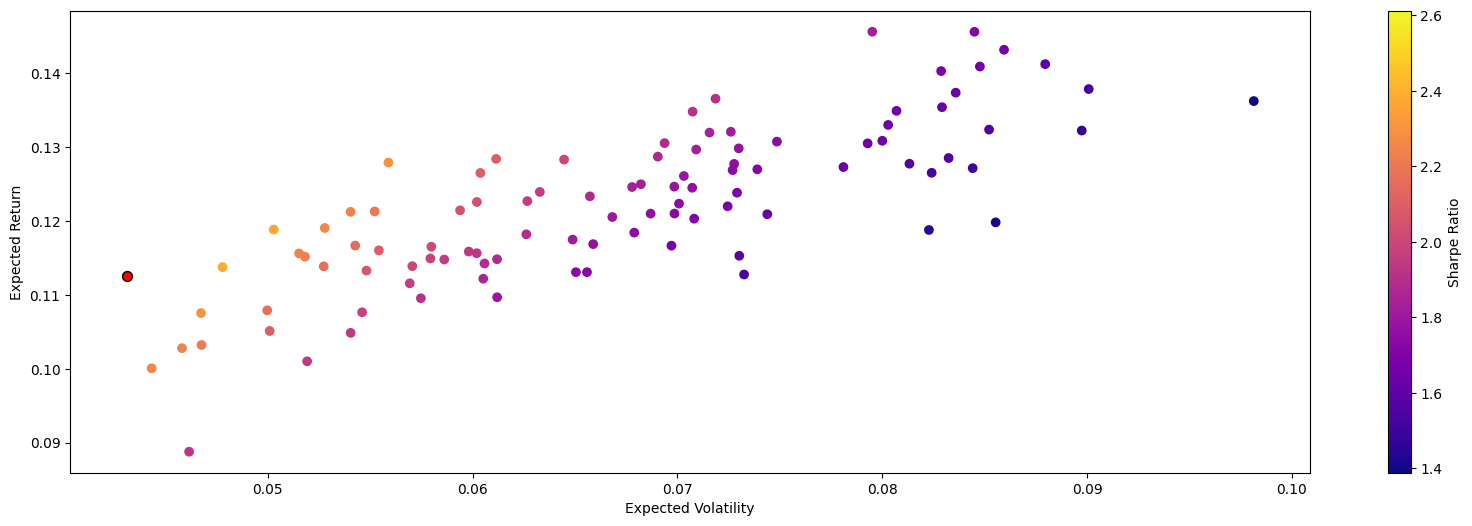

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.scatter(expected_volatility, expected_return, c = sharpe_ratio, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.scatter(expected_volatility[maxIndex], expected_return[maxIndex], c = 'red', s = 50, edgecolors = 'black')
plt.show()

In [23]:
from scipy.optimize import minimize
import numpy as np

def negativeSR(w):
  w = np.array(w)
  # Convert returns to a NumPy array if it's a Pandas object
  R = np.sum(returns.to_numpy() * w)
  V = np.sqrt(np.dot(w.T, np.dot(Sigma.to_numpy(), w)))
  SR = R / V
  return -1 * SR



w0 = [1 / len(Ngx_ticker)] * len(Ngx_ticker)
bnds = tuple((0, 1) for x in range(len(Ngx_ticker)))
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bnds, constraints=cons)
w_opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -33.55426417547832
       x: [ 0.000e+00  5.599e-01  9.370e-02  1.011e-01  0.000e+00
            5.192e-02  1.269e-01  0.000e+00  6.648e-02]
     nit: 19
     jac: [ 5.405e+01  1.067e-03 -1.960e-04 -6.073e-03  4.902e+01
           -1.426e-03 -8.111e-04  4.661e+01  3.262e-03]
    nfev: 208
    njev: 19

In [28]:
w_opt.x

array([3.87114368e-11, 5.06047438e-01, 2.42591136e-11, 0.00000000e+00,
       1.02445800e-01, 3.27579864e-10, 3.42038125e-10, 3.35138633e-02,
       3.57992897e-01])

Best volatility: 0.0431
Corresponding return: 0.1126


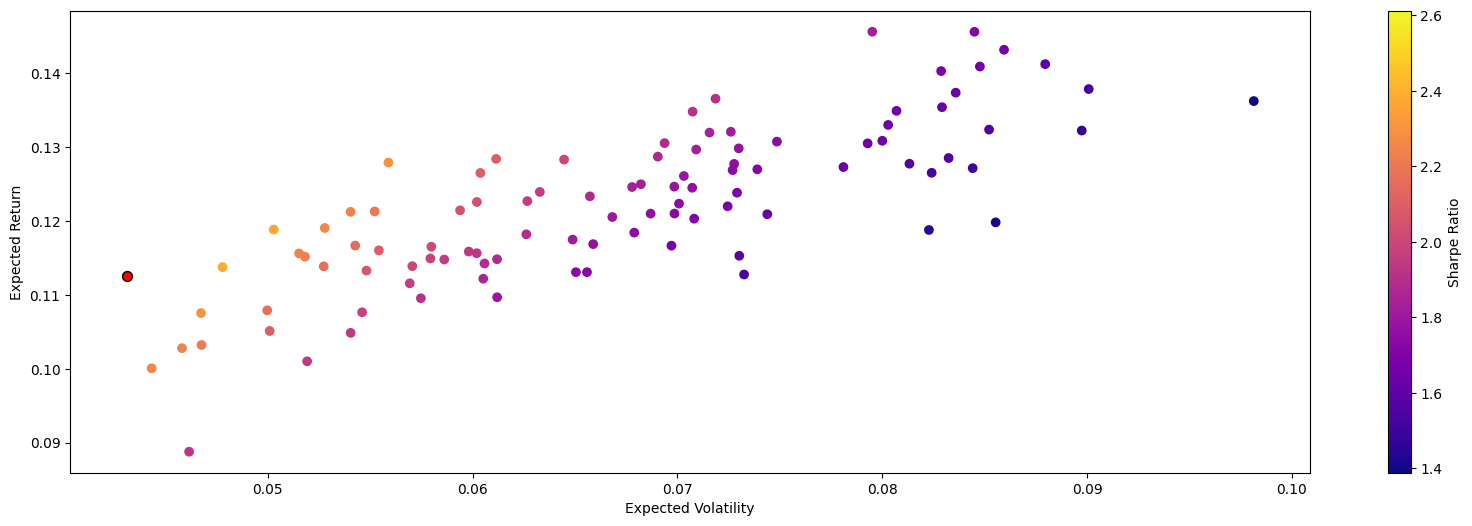

In [24]:
import matplotlib.pyplot as plt


# Set a minimum desired return (e.g., 0.01 for 1%)
min_desired_return = 0.01

# Filter portfolios with returns above the desired minimum
filtered_indices = expected_return > min_desired_return
filtered_volatility = expected_volatility[filtered_indices]
filtered_returns = expected_return[filtered_indices]

# Find the index of the minimum volatility among filtered portfolios
min_volatility_index = filtered_volatility.argmin()

# Get the volatility and return of the best portfolio
best_volatility = filtered_volatility[min_volatility_index]
best_return = filtered_returns[min_volatility_index]

# Print the results
print(f"Best volatility: {best_volatility:.4f}")
print(f"Corresponding return: {best_return:.4f}")

# Optionally, visualize the results
plt.figure(figsize=(20, 6))
plt.scatter(expected_volatility, expected_return, c=sharpe_ratio, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.scatter(
    best_volatility, best_return, c='red', s=50, edgecolors='black'
)  # Highlight the best portfolio
plt.show()

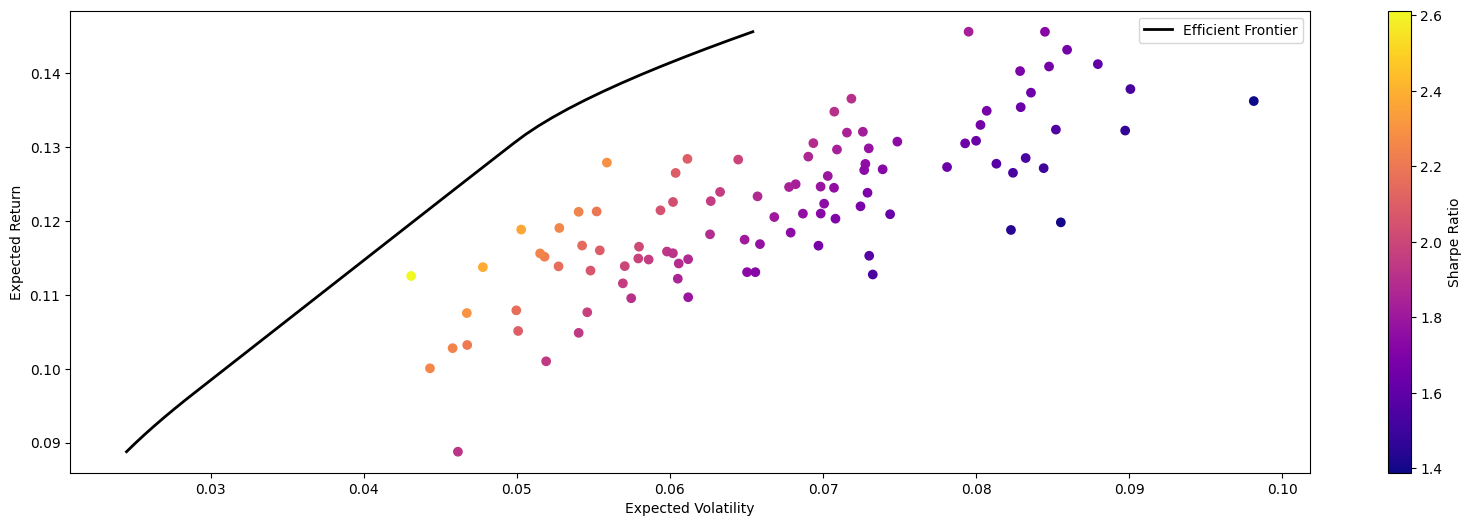

In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define a range of target returns
target_returns = np.linspace(
    expected_return.min(), expected_return.max(), 50
)

# Function to calculate portfolio volatility for given weights
def portfolio_volatility(weights, Sigma):
    return np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))


# Function to find optimal portfolio weights for a target return
def optimize_portfolio(target_return):
    constraints = (
        {"type": "eq", "fun": lambda x: np.sum(x) - 1},  # Weights sum to 1
        {
            "type": "eq",
            "fun": lambda x: np.sum(meanLogReturns * x) - target_return,
        },  # Target return constraint
    )
    bounds = tuple((0, 1) for x in range(len(Ngx_ticker)))
    result = minimize(
        portfolio_volatility,
        w0,
        args=(Sigma,),
        method="SLSQP",
        bounds=bounds,
        constraints=constraints,
    )
    return result.x


# Calculate efficient frontier points
efficient_frontier_volatility = []
for target in target_returns:
    optimal_weights = optimize_portfolio(target)
    volatility = portfolio_volatility(optimal_weights, Sigma)
    efficient_frontier_volatility.append(volatility)

# Plot the efficient frontier
plt.figure(figsize=(20, 6))
plt.scatter(
    expected_volatility, expected_return, c=sharpe_ratio, cmap="plasma"
)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.plot(
    efficient_frontier_volatility,
    target_returns,
    color="black",
    linewidth=2,
    label="Efficient Frontier",
)  # Add the line
plt.legend()
plt.show()